<a href="https://colab.research.google.com/github/chetan-957/Independent-Study/blob/main/Bitcoin_Price_Prediction_with_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Prediction with Sentiment Analysis**

### **📌 Why These Datasets?**
We are using **Bitcoin price data** and **Twitter sentiment data** to analyze whether **public sentiment influences Bitcoin price movements**. By merging **historical price trends** with **social media sentiment**, we can identify patterns and improve Bitcoin price prediction models.

### **📌 What’s in the Datasets?**
1. **Bitcoin Price Data** (`bitcoin_historical_data.csv`):https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data  
   - Contains **timestamped** Bitcoin trading data (Open, High, Low, Close, Volume).
   - Helps analyze **price trends, volatility, and market movements** over the years.

2. **Bitcoin Sentiment Data** (`bitcoin_tweets_sampled.csv`):https://www.kaggle.com/datasets/gautamchettiar/bitcoin-sentiment-analysis-twitter-data?resource=download  
   - Includes Bitcoin-related **tweets** with **sentiment scores** (Positive, Neutral, Negative).
   - Helps understand **public sentiment trends** and their impact on price fluctuations.

By combining these datasets, we can explore **the relationship between social media sentiment and Bitcoin price trends**, helping us build **a predictive model**. 🚀

In [ ]:
import gdown
import pandas as pd

# Google Drive file IDs
btc_price_file_id = "11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik"
btc_tweets_file_id = "1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6"

# Define output file names
btc_price_output = "bitcoin_historical_data.csv"
btc_tweets_output = "bitcoin_tweets_sampled.csv"

# Download Bitcoin Historical Data
gdown.download(f"https://drive.google.com/uc?id={btc_price_file_id}", btc_price_output, quiet=False)

# Download Bitcoin Tweets Sentiment Data
gdown.download(f"https://drive.google.com/uc?id={btc_tweets_file_id}", btc_tweets_output, quiet=False)

print("✅ Files downloaded successfully!")


Downloading...
From (original): https://drive.google.com/uc?id=11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik
From (redirected): https://drive.google.com/uc?id=11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik&confirm=t&uuid=69451a25-2e5a-4488-83d8-fdea7189f7bf
To: /content/bitcoin_historical_data.csv
100%|██████████| 352M/352M [00:03<00:00, 90.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6
From (redirected): https://drive.google.com/uc?id=1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6&confirm=t&uuid=bfcc2691-6f8c-4724-8633-09de51b67c4a
To: /content/bitcoin_tweets_sampled.csv
100%|██████████| 291M/291M [00:01<00:00, 162MB/s]

✅ Files downloaded successfully!


## **1.Load the Data**



In [ ]:
# Define file paths
btc_price_output = "/content/bitcoin_historical_data.csv"
btc_tweets_output = "/content/bitcoin_tweets_sampled.csv"

# Load Bitcoin Price Data (first 50,000 rows for efficiency)
btc_price_data = pd.read_csv(btc_price_output, encoding="latin1", nrows=50000)

# Load Bitcoin Tweets Sentiment Data (first 50,000 rows for efficiency)
btc_tweets_data = pd.read_csv(btc_tweets_output, encoding="latin1", nrows=50000)


In [ ]:
print("Bitcoin Price Data Overview:")
btc_price_data.info()
btc_price_data.head()

Bitcoin Price Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  50000 non-null  float64
 1   Open       50000 non-null  float64
 2   High       50000 non-null  float64
 3   Low        50000 non-null  float64
 4   Close      50000 non-null  float64
 5   Volume     50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [ ]:
print("\nBitcoin Tweets Sentiment Data Overview:")
btc_tweets_data.info()
btc_tweets_data.head()



Bitcoin Tweets Sentiment Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50000 non-null  object 
 1   user_name         49998 non-null  object 
 2   user_location     28219 non-null  object 
 3   user_description  46477 non-null  object 
 4   user_created      49996 non-null  object 
 5   user_followers    49998 non-null  object 
 6   user_friends      49997 non-null  object 
 7   user_favourites   49997 non-null  object 
 8   user_verified     49997 non-null  object 
 9   date              49996 non-null  object 
 10  text              49994 non-null  object 
 11  hashtags          43822 non-null  object 
 12  source            49716 non-null  object 
 13  is_retweet        49991 non-null  object 
 14  cleanText         49987 non-null  object 
 15  Polarity Score    49987 non-null  float64
 16 

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0
1,1,CryptoND,NaN,Ã°ÂÂÂ BITCOINLIVE is a Dutch platform aimed...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"Ã°ÂÂÂ Today, that's this #Thursday, we will...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0
4,4,Alex Kirchmaier Ã°ÂÂÂ¦Ã°ÂÂÂ¹Ã°ÂÂÂ¸Ã°ÂÂ...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

btc_price_output = "/content/bitcoin_historical_data.csv"

# Load Bitcoin Price Data (first 50,000 rows for efficiency)
btc_price_data = pd.read_csv(btc_price_output, encoding="latin1", nrows=50000)

# Convert 'Timestamp' column to datetime
btc_price_data['Date'] = pd.to_datetime(btc_price_data['Timestamp'], unit='s')

# Drop the original 'Timestamp' column
btc_price_data.drop(columns=['Timestamp'], inplace=True)

# Display the first few rows to confirm the conversion
btc_price_data.head()



,Open,High,Low,Close,Volume,Date
0,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00


In [ ]:
# Extract 'Year' column
btc_price_data['Year'] = btc_price_data['Date'].dt.year

# Separate Date and Time into different columns
btc_price_data['Only_Date'] = btc_price_data['Date'].dt.date  # Extracts only the date (YYYY-MM-DD)
btc_price_data['Only_Time'] = btc_price_data['Date'].dt.time  # Extracts only the time (HH:MM:SS)

# Display first few rows
btc_price_data.head()

,Open,High,Low,Close,Volume,Date,Year,Only_Date,Only_Time
0,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00,2012,2012-01-01,10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00,2012,2012-01-01,10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00,2012,2012-01-01,10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00,2012,2012-01-01,10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00,2012,2012-01-01,10:05:00


In [ ]:
# Drop the original 'Date' column
btc_price_data.drop(columns=['Date'], inplace=True)

# Rename columns
btc_price_data.rename(columns={'Only_Date': 'Date', 'Only_Time': 'Time'}, inplace=True)

# Display first few rows to confirm changes
btc_price_data.head()


,Open,High,Low,Close,Volume,Year,Date,Time
0,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:05:00


In [ ]:
# Combine 'Date' and 'Time' into a new column 'Date_Time'
btc_price_data['Date_Time'] = pd.to_datetime(btc_price_data['Date'].astype(str) + ' ' + btc_price_data['Time'].astype(str))

# Display first few rows to confirm changes
btc_price_data.head()


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time
0,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:01:00,2012-01-01 10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:02:00,2012-01-01 10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:03:00,2012-01-01 10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:04:00,2012-01-01 10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012,2012-01-01,10:05:00,2012-01-01 10:05:00


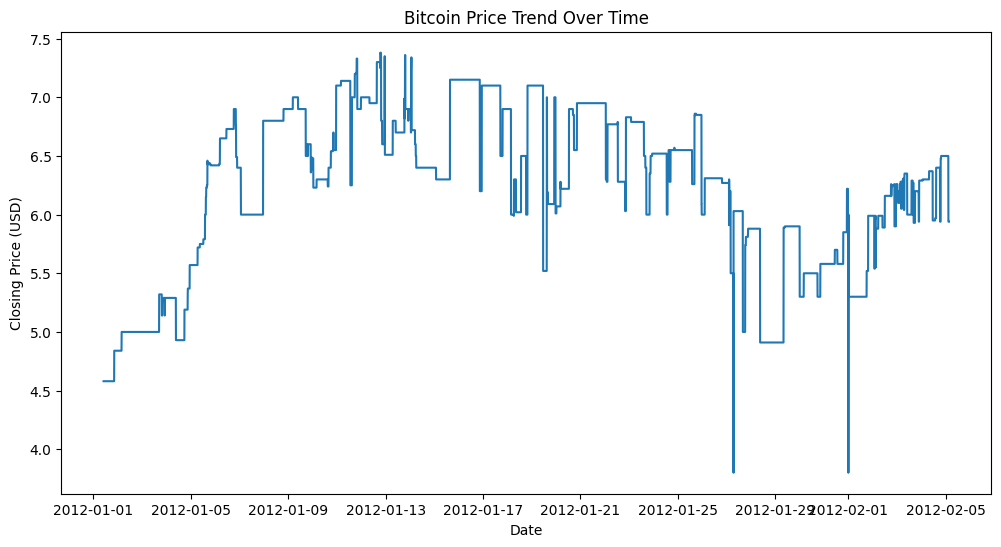

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bitcoin Price Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=btc_price_data['Date'], y=btc_price_data['Close'])
plt.title("Bitcoin Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


In [ ]:
# Check for missing values
print("Missing Values in Bitcoin Price Data:")
print(btc_price_data.isnull().sum())

Missing Values in Bitcoin Price Data:
Open      0
High      0
Low       0
Close     0
Volume    0
Date      0
dtype: int64


In [ ]:
# Check for missing values
print("\nMissing Values in Bitcoin Tweets Sentiment Data:")
print(btc_tweets_data.isnull().sum())


Missing Values in Bitcoin Tweets Sentiment Data:
Unnamed: 0              0
user_name               2
user_location       21781
user_description     3523
user_created            4
user_followers          2
user_friends            3
user_favourites         3
user_verified           3
date                    4
text                    6
hashtags             6178
source                284
is_retweet              9
cleanText              13
Polarity Score         13
sentiment              13
dtype: int64
